In [4]:
import numpy as np
from tqdm import tqdm
from random import randint
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
#% matplotlib inline


In [5]:
data = np.loadtxt('./wine.data', delimiter=',')

X, y = data[:, 1:], data[:,0]

# tranform problem into binary classification task
idxs = [i for i in range(len(y)) if y[i] == 1 or y[i] == 2]

X, y = X[idxs], y[idxs]

# normalize data
X = (X - X.mean(axis=0))/(X.max(axis=0) - X.min(axis=0))
X = np.hstack((X,np.ones(len(X)).reshape(len(X),1)))

# transform target variable
y = np.array(list(map(lambda x: 0 if x == 1 else 1, y)))

In [6]:
# scikit learn implementation (our benchmark)
reg = LogisticRegression(solver='sag', C=100000, max_iter = 10000).fit(X,y)
L_star = log_loss(y,reg.predict_proba(X))

print("Loss L* = {:<16f}".format(log_loss(y,reg.predict_proba(X))))

Loss L* = 0.000387        


In [7]:
# helper functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def cross_entropy_loss(y,y_pred):
    loss = -(1/len(y))*np.sum(y*np.log(y_pred) + (1 - y)*np.log(1 - y_pred))
    return loss

def cross_entropy_grad(y,y_pred,x):
    return list(np.dot((y_pred - y),X)[0])

**Best Index**

In [8]:
# initial weights
w = np.zeros(14).reshape(14,1)
w_rand = w

eta = 0.01
loss = []
loss_rand = []
num_iter = 1005000 # just take a bunch of iterations
for t in tqdm(range(num_iter)):

    # predict step
    y_pred = sigmoid(np.dot(w.T,X.T))
    grad = cross_entropy_grad(y,y_pred,X)

    largest = np.argmax(np.abs(grad)) # idx with largest magnitude
    loss.append(cross_entropy_loss(y,y_pred))

    # update that coordinate with largest gradient in magnitude
    w[largest] = w[largest] - eta*grad[largest]

y_pred = sigmoid(np.dot(w.T,X.T))
y_pred = np.array(list(map(lambda x: 1 if x >= 0.5 else 0, y_pred.flatten()))) # post processing

print("Accuracy for best coordinate descent {0}".format(accuracy_score(y, y_pred)))
print("Loss L = {0}".format(loss[-1]))

100%|██████████| 1005000/1005000 [01:37<00:00, 10321.66it/s]

Accuracy for best coordinate descent 1.0
Loss L = 0.0004698390523920375


**Random Index**

In [10]:
# initial weights
w = np.zeros(14).reshape(14,1)
w_rand = w

eta = 0.01
loss_rand = []
num_iter = 1005000
for t in tqdm(range(num_iter)):

    # predict step
    y_pred = sigmoid(np.dot(w.T,X.T))
    loss_rand.append(cross_entropy_loss(y,y_pred))
    grad = cross_entropy_grad(y,y_pred,X)
    random = randint(0,13)

    # update random coordinate
    w_rand[random] = w_rand[random] - eta*grad[random]

y_pred = sigmoid(np.dot(w_rand.T,X.T))
y_pred = np.array(list(map(lambda x: 1 if x >= 0.5 else 0, y_pred.flatten())))

print("Accuracy for random coordinate descent {0}".format(accuracy_score(y, y_pred)))
print("Loss L = {0}".format(loss[-1]))

100%|██████████| 1005000/1005000 [01:13<00:00, 13585.97it/s]

Accuracy for random coordinate descent 1.0
Loss L = 0.0004698390523920375


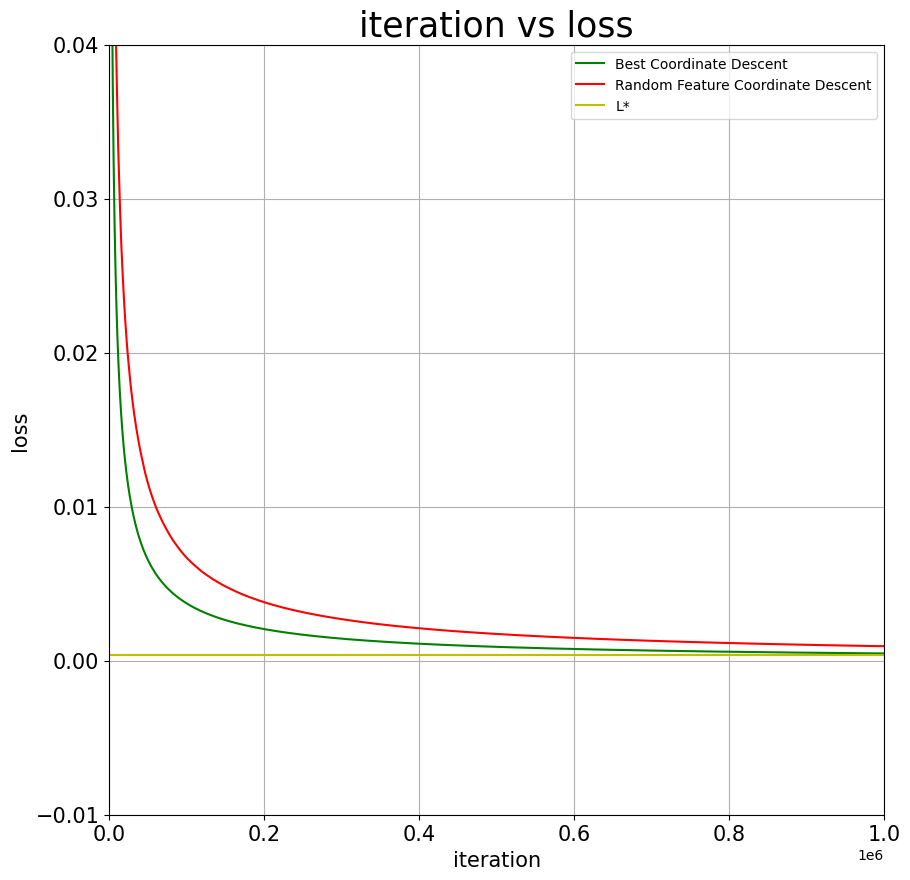

In [11]:
plt.figure(figsize=(10,10))
plt.plot(loss, 'g-', label='Best Coordinate Descent') # loss best coordinate descent
plt.plot(loss_rand, 'r-', label='Random Feature Coordinate Descent')
plt.axhline(y=L_star, color='y', label='L*')
plt.title('iteration vs loss', fontsize=25)
plt.xlabel('iteration', fontsize=15)
plt.xlim(0,1000000)
plt.ylim((-0.01,0.04))
plt.ylabel('loss', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend()